# Esercitazione 10 - Parallel Computing 

In questa esercitazione si introduce la metodologia del Parallel Computing. I codici realizzati sinora sono stati eseguiti come singoli processi, ciò non sfrutta appieno la potenza della CPU, per questo motivo si può adottare il paradigma del calcolo parallelo. Quest'ultimo si basa sullo scomporre una task in diversi processi (idealmente uno per core presente sulla macchina in uso, nella pratica si può superare questo limite anche se non sempre si rivela la scelta più efficente), eseguiti in maniera indipendente, ma con la possibilità di comunicare tra di loro.

A questo scopo è stato implementato nel codice C++, MPI (Message Passing Interface) che è uno standard per la programmazione parallela distribuita, usato per far comunicare processi distinti, tipicamente su più core o nodi di un cluster.
Esso permette a ciascun processo di avere memoria indipendente e di scambiarsi dati tramite messaggi espliciti (send, recv, ecc.).

Per prima cosa si parallelizza il codice realizzato nell'esercitazione 9, utilizzando dapprima un numero di core pari a 8 ciascuno dei quali esegue in maniera **indipendente** una "*Genetic Search" (GA)*. In questo modo si eseguono contemporaneamente 8 algoritmi genetici per la ricerca della sequenza che ottimizza il percorso del TSP che non comunicano tra di loro. Infine si può prendere come risultato, la sequenza migliore tra le migliori sequenze trovate da ciascuno processo.

Verrà spiegato in seguito come questo approccio non sfrutti completamente le potenzialità del parallel computing, verrà dunque implementata la possibilità che i vari processi si scambino dati tra di loro, che si traduce in una maggior velocità di convergenza verso la sequenza ottimale.

Di seguito sono riportate le 8 ricerche indipendenti per la sequenza migliore di città da visitare, usando le configurazioni a cerchio e quadrato dell'esercitazione precedente.


Minimo globale tra tutti i core, per configurazione cerchio : 0.21009599999999998 trovato da core  0
Minimo globale tra tutti i core, per configurazione quadrato : 0.0864065 trovato da core  6


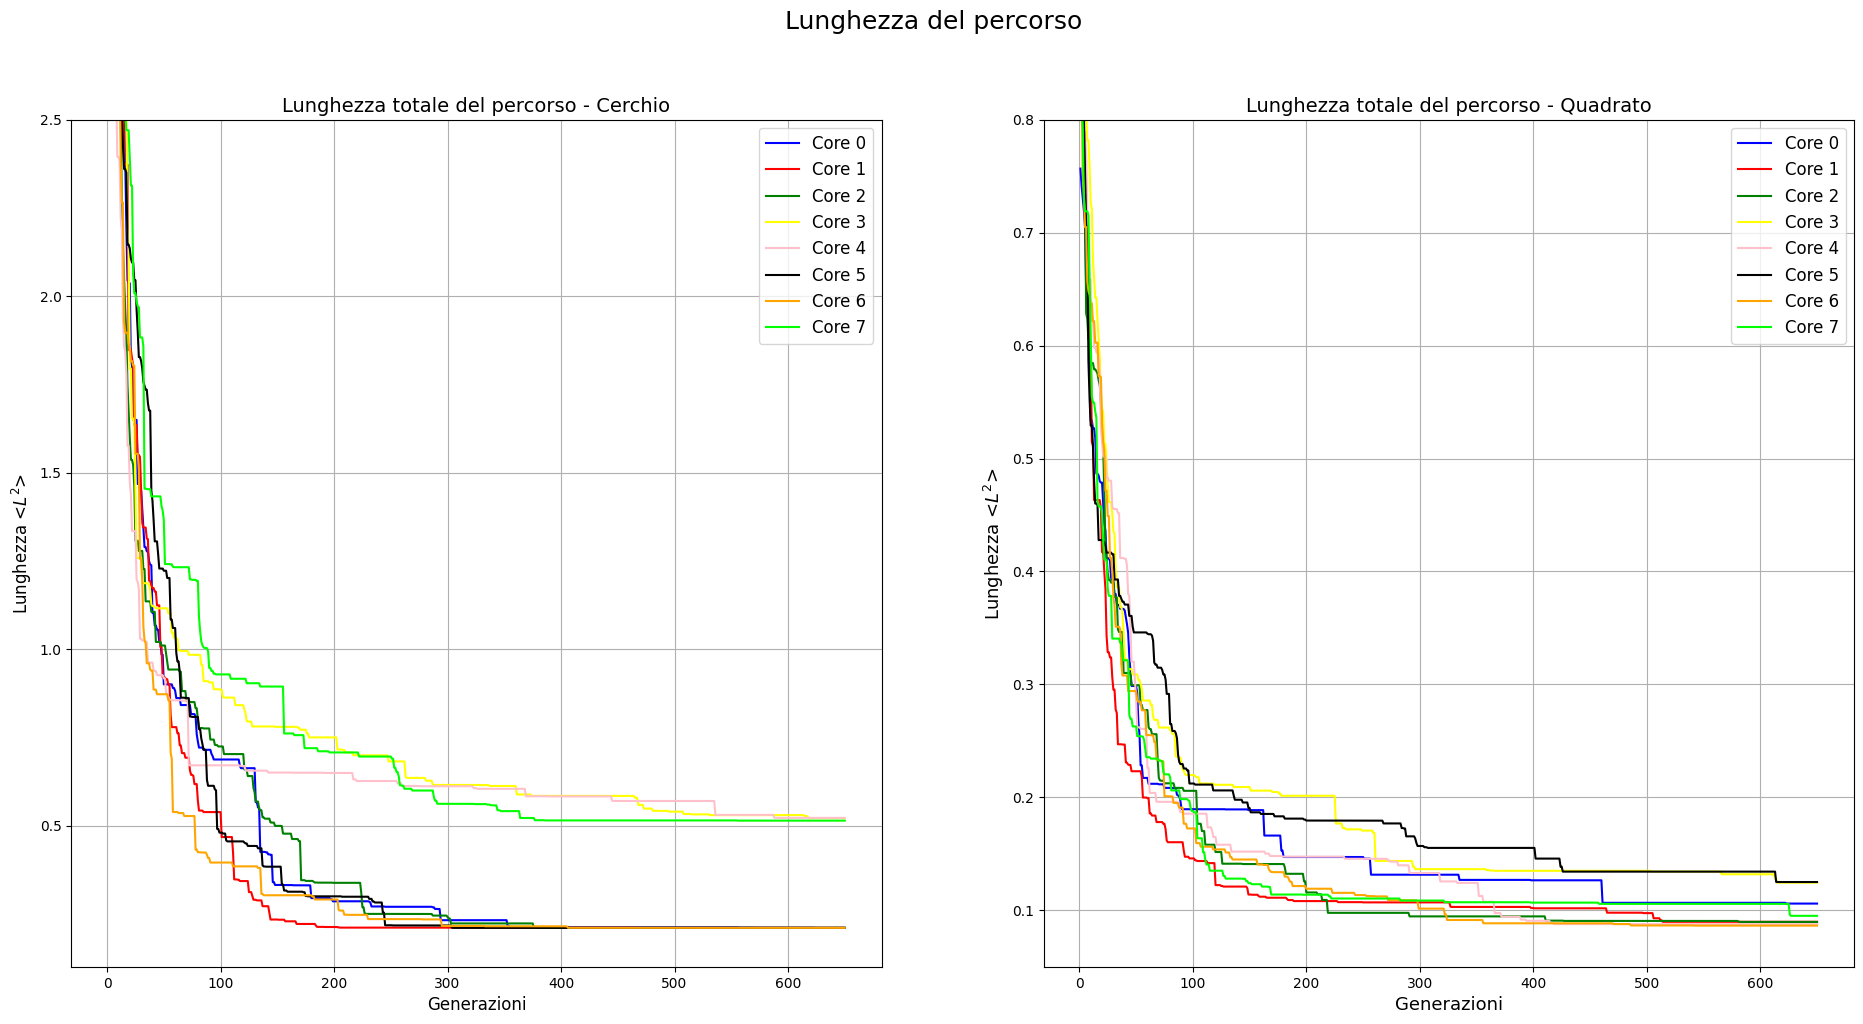

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Cerchio

# Caricamento dati
b_lun, m_lun = np.loadtxt("Results_IndependentGA_Square_Circle/Lenght_0.08_0.60_Circle_Core0", unpack=True, skiprows=1, usecols=(1, 2))
gen = np.arange(1, b_lun.size + 1)

# Creazione dei subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 11))
plt.suptitle(r"Lunghezza del percorso", size=18)

min_vals = []
colors = ['blue', 'red', 'green', 'yellow', 'pink', 'black', 'orange', 'lime']

ax1.set_ylim(0.1, 2.5)
for i, color in enumerate(colors):
    path = f"Results_IndependentGA_Square_Circle/Lenght_0.08_0.60_Circle_Core{i}"
    b_lun, m_lun = np.loadtxt(path, unpack=True, skiprows=1, usecols=(1, 2))
    ax1.plot(gen, b_lun / 100000, color=color, label=f"Core {i}")
    min_vals.append(np.min(b_lun / 100000))

print("Minimo globale tra tutti i core, per configurazione cerchio :", min(min_vals), "trovato da core ",  np.argmin(min_vals))



ax1.set_title("Lunghezza totale del percorso - Cerchio", fontsize=14)
ax1.set_xlabel("Generazioni", fontsize=12)
ax1.set_ylabel(r'Lunghezza <$L^2$>', fontsize=12)
ax1.legend(loc='upper right', prop={'size': 12})
ax1.grid(True)

#Quadrato

# Caricamento dati
b_lun, m_lun = np.loadtxt("Results_IndependentGA_Square_Circle/Lenght_0.08_0.60_Square_Core0", unpack=True, skiprows=1, usecols=(1, 2))



# Primo grafico: lunghezze
ax2.set_ylim(0.05, 0.8)

min_vals = []

for i, color in enumerate(colors):
    path = f"Results_IndependentGA_Square_Circle/Lenght_0.08_0.60_Square_Core{i}"
    b_lun, m_lun = np.loadtxt(path, unpack=True, skiprows=1, usecols=(1, 2))
    ax2.plot(gen, b_lun / 100000, color=color, label=f"Core {i}")
    min_vals.append(np.min(b_lun / 100000))

print("Minimo globale tra tutti i core, per configurazione quadrato :", min(min_vals), "trovato da core ",  np.argmin(min_vals))


ax2.set_title("Lunghezza totale del percorso - Quadrato", fontsize=14)
ax2.set_xlabel("Generazioni", fontsize=13)
ax2.set_ylabel(r'Lunghezza <$L^2$>', fontsize=13)
ax2.legend(loc='upper right', prop={'size': 12})
ax2.grid(True)

Il percorso migliore, trovato rispettivamente dal core 0 per il cerchio e dal core 6 per il quadrato assume la forma:

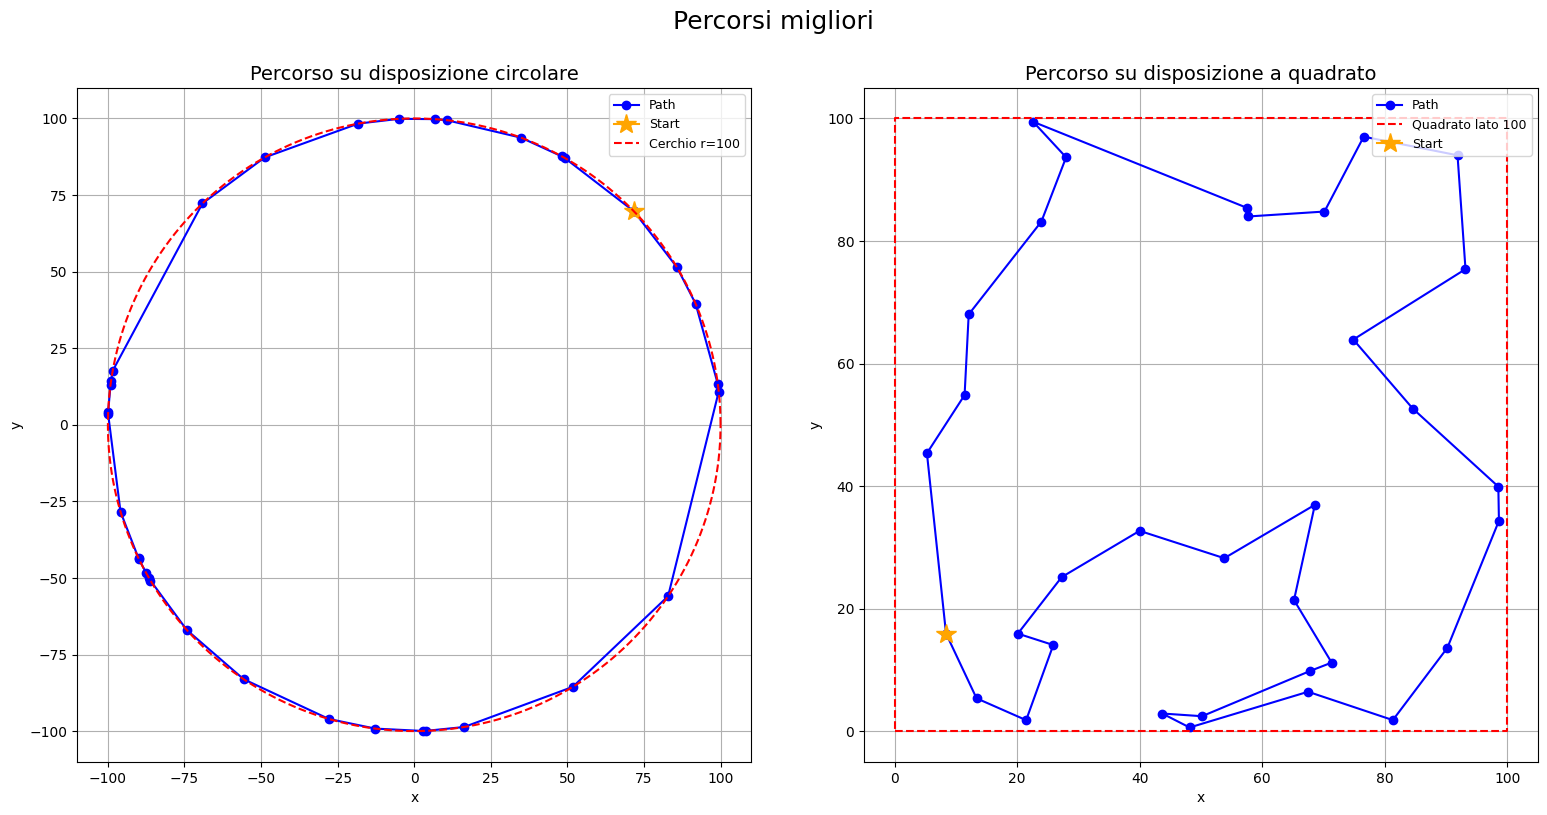

In [16]:
# Creazione dei subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle("Percorsi migliori", size=18)

# Primo grafico: circonferenza

x_path, y_path = np.loadtxt("Results_IndependentGA_Square_Circle/Path_0.08_0.60_Circle_Core0", unpack=True, skiprows=1, usecols=(0, 1))

ax1.plot(x_path, y_path, color='blue', marker='o', linestyle='-', label='Path')  # percorso ordinato
# Evidenzia il punto di partenza
ax1.plot(x_path[0], y_path[0], marker='*', color='orange', markersize=15, label='Start')

# Aggiunta della circonferenza
theta = np.linspace(0, 2 * np.pi, 500)
raggio = 100
x_circ = raggio * np.cos(theta)
y_circ = raggio * np.sin(theta)
ax1.plot(x_circ, y_circ, 'r--', label='Cerchio r=100')  # cerchio tratteggiato rosso

# Settaggi grafico percorso
ax1.set_aspect('equal')  # scala proporzionata
ax1.set_title("Percorso su disposizione circolare", fontsize=14)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True)
ax1.legend(loc='upper right', prop={'size': 9})

# Secondo grafico: quadrato
x_path, y_path = np.loadtxt("Results_IndependentGA_Square_Circle/Path_0.08_0.60_Square_Core6", unpack=True, skiprows=1, usecols=(0, 1))

ax2.plot(x_path, y_path, color='blue', marker='o', linestyle='-', label='Path')  # percorso ordinato

x_quad = [0, 100, 100, 0, 0]
y_quad = [0, 0, 100, 100, 0]

ax2.plot(x_quad, y_quad, 'r--', label='Quadrato lato 100')  # linea rossa tratteggiata
# Evidenzia il punto di partenza
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', markersize=15, label='Start')

# Settaggi grafico percorso
ax2.set_aspect('equal')  # scala proporzionata
ax2.set_title("Percorso su disposizione a quadrato", fontsize=14)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Il risultato ottenuto per il cerchio è identico a quello trovato nell'esercitazione 9, mentre il risultato per il quadrato è leggermente peggiore rispetto a quanto trovato nell'esercitazione 9 (soltanto per lo scambio di due punti).

## TSP con città italiane

Si ripete la stessa analisi svolta sopra in questo caso con una differente configurazione: si vuole trovare il percorso minimo (in linea d'aria) che collega le città italiane.

**NB: le coordinate di latitudine e longitudine sono state prese come semplici coordinate x e y nell'algoritmo genetico. In questo modo si trascura la curvatura e non si ha una descrizione realistica delle distanze, ciò non rappresenta comunque un problema per la risoluzione del TSP, che mira soltanto a minimizzare le distanze tra i punti.***

#### Si riportano i risultati con i seguenti settaggi:
- Individui per popolazione: 150
- Generazioni: 1000
- Numero di città: 110
- $P_{cross} = 60 \%$
- $P_{mut} = 8 \%$

Minimo globale: 0.001195, trovato da Core 3


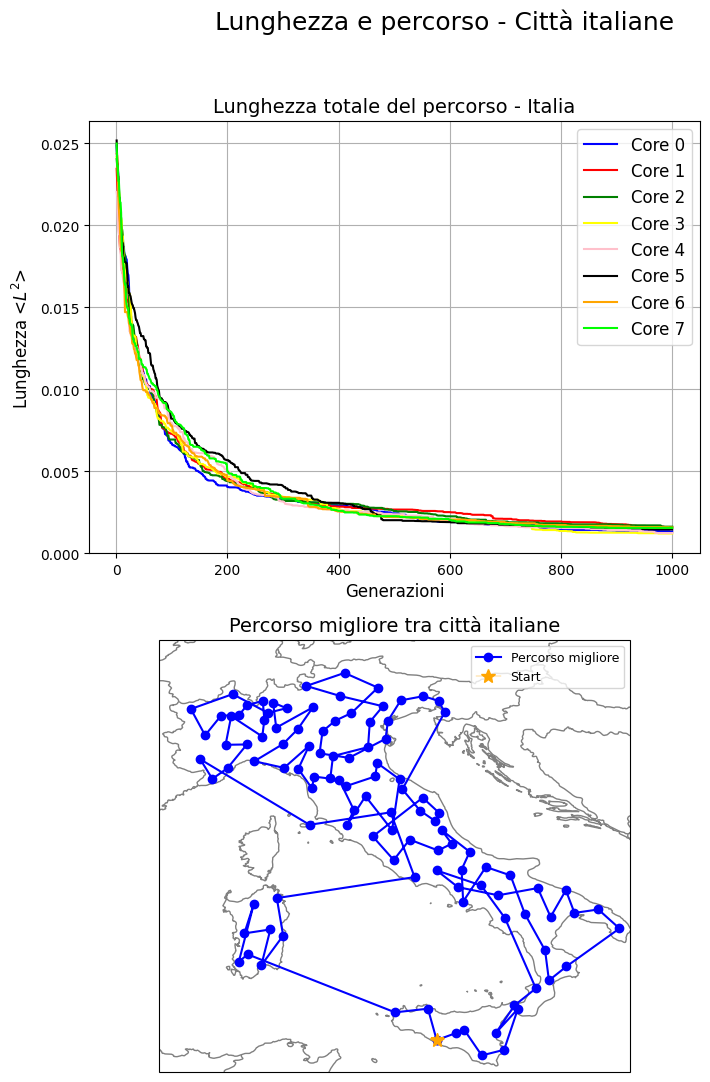

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(9, 11))
plt.suptitle("Lunghezza e percorso - Città italiane", size=18)

#Subplot 1: lunghezze 
ax1 = fig.add_subplot(2, 1, 1)
colors = ['blue','red','green','yellow','pink','black','orange','lime']
min_vals = []

# Carico gen da un file qualsiasi (Core0)
b_lun = np.loadtxt(
    "Results_Ita_No_Migr/Lenght_0.08_0.60_CittaIta_Core0.dat",
    unpack=True, skiprows=1, usecols=(1,)
)
gen = np.arange(1, b_lun.size+1)

for i, col in enumerate(colors):
    fname = f"Results_Ita_No_Migr/Lenght_0.08_0.60_CittaIta_Core{i}.dat"
    b = np.loadtxt(fname, skiprows=1, usecols=(1))
    ax1.plot(gen, b/100000, color=col, label=f"Core {i}")
    min_vals.append(np.min(b/100000))

min_value = min(min_vals)
best_core = int(np.argmin(min_vals))
print(f"Minimo globale: {min_value:.6f}, trovato da Core {best_core}")


ax1.set_title("Lunghezza totale del percorso - Italia", fontsize=14)
ax1.set_xlabel("Generazioni", fontsize=12)
ax1.set_ylabel(r'Lunghezza <$L^2$>', fontsize=12)
ax1.legend(loc='upper right', prop={'size': 12})
ax1.grid(True)


# — Subplot 2: percorso con contorno Italia —
# Usiamo un asse georeferenziato
proj = ccrs.PlateCarree()
ax2 = fig.add_subplot(2, 1, 2, projection=proj)

# Carico il percorso del core migliore
pathfile = f"Results_Ita_No_Migr/Path_0.08_0.60_CittaIta_Core{best_core}.dat"
x_path, y_path = np.loadtxt(pathfile, unpack=True, skiprows=1, usecols=(0,1))

ax2.plot(x_path, y_path, marker='o', linestyle='-', color='blue', label='Percorso migliore')
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', linewidth=0.3, markersize=10, label='Start')

# Aggiungo i confini Italia da Cartopy
ax2.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='gray')
ax2.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='gray')

# Imposto limiti che contengano tutta l’Italia
ax2.set_extent([6.5, 18.5, 36.5, 47.5], crs=proj)

ax2.set_aspect('equal')
ax2.set_title("Percorso migliore tra città italiane", fontsize=14)
ax2.set_xlabel("Longitudine", fontsize=12)
ax2.set_ylabel("Latitudine", fontsize=12)
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()



Dal percorso visibile nell'ultima immagine si nota immediatamente che quanto trovato è lontano dall'essere il risultato ottimale. Prima di introdurre l'operazione di scambio dati tra i core, si riprova lo stesso algoritmo, stavolta aumentando l'espressività della popolazione, portando il numero di individui a $400$ e aumentando il numero di generazioni.

#### Si riportano i risultati con i seguenti settaggi:
- Individui per popolazione: 400
- Generazioni: 1200
- Numero di città: 110
- $P_{cross} = 60 \%$
- $P_{mut} = 8 \%$

Minimo globale: 0.000823, trovato da Core 1


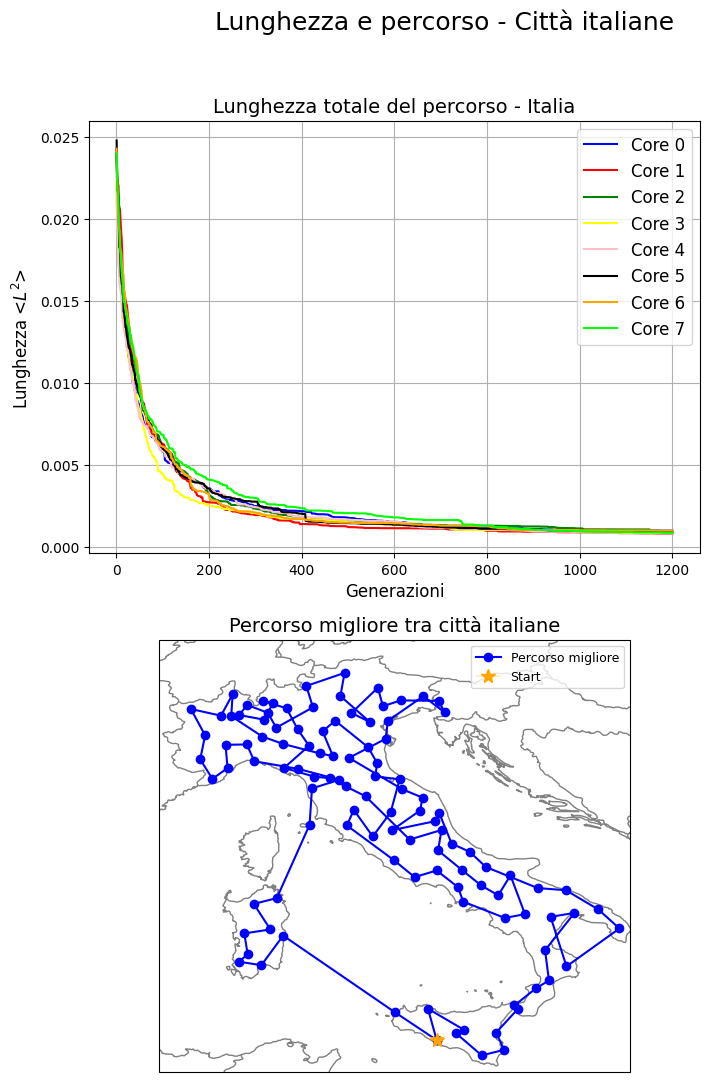

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(9, 11))
plt.suptitle("Lunghezza e percorso - Città italiane", size=18)

#Subplot 1: lunghezze 
ax1 = fig.add_subplot(2, 1, 1)
colors = ['blue','red','green','yellow','pink','black','orange','lime']
min_vals = []

# Carico gen da un file qualsiasi (Core0)
b_lun = np.loadtxt(
    "Results_Ita_No_Migr_V2/Lenght_0.08_0.60_CittaIta_Core0.dat",
    unpack=True, skiprows=1, usecols=(1,)
)
gen = np.arange(1, b_lun.size+1)

for i, col in enumerate(colors):
    fname = f"Results_Ita_No_Migr_V2/Lenght_0.08_0.60_CittaIta_Core{i}.dat"
    b = np.loadtxt(fname, skiprows=1, usecols=(1))
    ax1.plot(gen, b/100000, color=col, label=f"Core {i}")
    min_vals.append(np.min(b/100000))

min_value = min(min_vals)
best_core = int(np.argmin(min_vals))
print(f"Minimo globale: {min_value:.6f}, trovato da Core {best_core}")


ax1.set_title("Lunghezza totale del percorso - Italia", fontsize=14)
ax1.set_xlabel("Generazioni", fontsize=12)
ax1.set_ylabel(r'Lunghezza <$L^2$>', fontsize=12)
ax1.legend(loc='upper right', prop={'size': 12})
ax1.grid(True)


# — Subplot 2: percorso con contorno Italia —
# Usiamo un asse georeferenziato
proj = ccrs.PlateCarree()
ax2 = fig.add_subplot(2, 1, 2, projection=proj)

# Carico il percorso del core migliore
pathfile = f"Results_Ita_No_Migr_V2/Path_0.08_0.60_CittaIta_Core{best_core}.dat"
x_path, y_path = np.loadtxt(pathfile, unpack=True, skiprows=1, usecols=(0,1))

ax2.plot(x_path, y_path, marker='o', linestyle='-', color='blue', label='Percorso migliore')
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', linewidth=0.3, markersize=10, label='Start')

# Aggiungo i confini Italia da Cartopy
ax2.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='gray')
ax2.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='gray')

# Imposto limiti che contengano tutta l’Italia
ax2.set_extent([6.5, 18.5, 36.5, 47.5], crs=proj)

ax2.set_aspect('equal')
ax2.set_title("Percorso migliore tra città italiane", fontsize=14)
ax2.set_xlabel("Longitudine", fontsize=12)
ax2.set_ylabel("Latitudine", fontsize=12)
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

In questo caso la lunghezza totale del percorso è diminuita di circa il $31\%$, ciò nonostante il risultato non è ancora convergente al minimo globale.

Si introduce ora la possibilità per i vari processi di scambiarsi i dati tra di loro, in dettaglio:
- Ciascun processo, denominato *"continente"* esegue il proprio GA in maniera **indipendente**.
- Ogni $N_{migr}$ generazioni, coppie di core presi a caso si scambiano tra di loro il rispettivo individuo (sequenza) con fitness più alta, questa mossa è definita *"migrazione"*.

In questo modo l'algoritmo è in grado di esplorare ulteriormente diverse possibilità derivanti dall'incrocio di due individui promettenti trovati da diversi processi. Ciò aiuta ogni processo a non bloccarsi su soluzioni subottimali e permette ai diversi *continenti* di beneficiare delle scoperte altrui ed accellerare quindi la convergenza verso il minimo globale.

Il numero $N_{migr}$ di gerazioni che trascorrono tra una migrazione e l'altra va scelto in maniera opportuna. Un valore troppo alto non porterebbe significativi miglioramenti, poichè è simile ad avere processi totalmente indipendenti, viceversa un valore troppo basso porta i vari processi a sviluppare popolazioni troppo simili tra di loro, peggiorando la flessibilità del codice nell'esplorare zone diverse.

Vengono di seguito riportati i risultati per un primo tentativo svolto con gli stessi settaggi degli ultimi grafici riportati, con il parametro $N_{migr} = 25$.

Minimo globale: 0.000620, trovato da Core 3


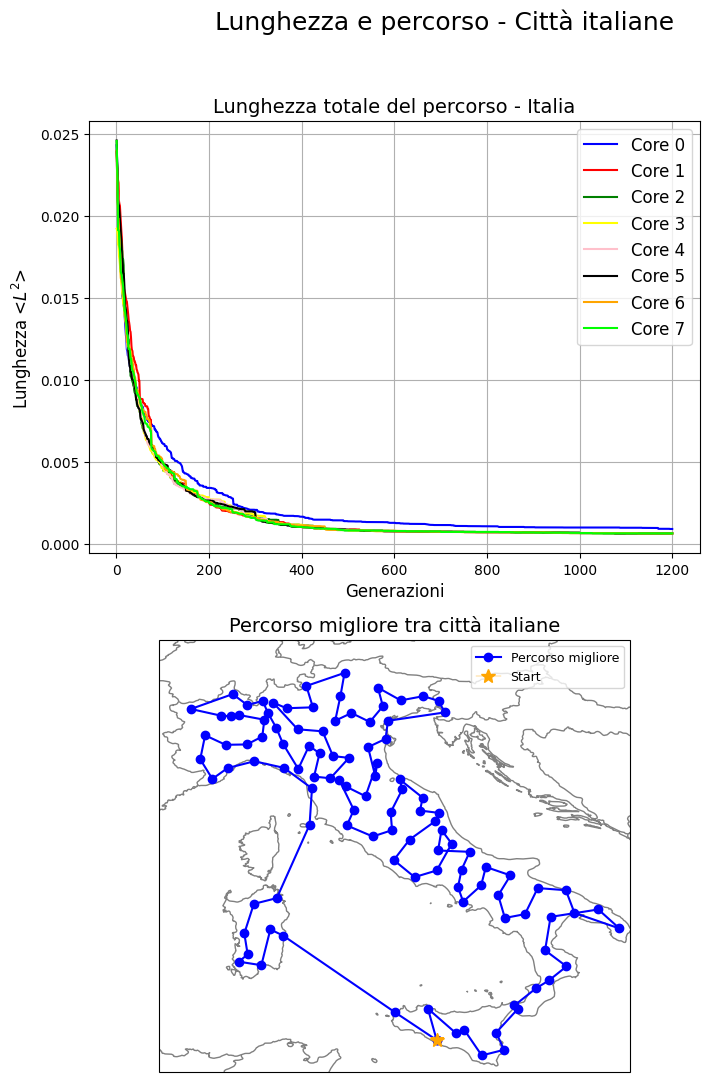

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(9, 11))
plt.suptitle("Lunghezza e percorso - Città italiane", size=18)

#Subplot 1: lunghezze 
ax1 = fig.add_subplot(2, 1, 1)
colors = ['blue','red','green','yellow','pink','black','orange','lime']
min_vals = []

# Carico gen da un file qualsiasi (Core0)
b_lun = np.loadtxt(
    "Results_Ita_Migr/Lenght_0.08_0.60_CittaIta_Core0.dat",
    unpack=True, skiprows=1, usecols=(1,)
)
gen = np.arange(1, b_lun.size+1)

for i, col in enumerate(colors):
    fname = f"Results_Ita_Migr/Lenght_0.08_0.60_CittaIta_Core{i}.dat"
    b = np.loadtxt(fname, skiprows=1, usecols=(1))
    ax1.plot(gen, b/100000, color=col, label=f"Core {i}")
    min_vals.append(np.min(b/100000))

min_value = min(min_vals)
best_core = int(np.argmin(min_vals))
print(f"Minimo globale: {min_value:.6f}, trovato da Core {best_core}")


ax1.set_title("Lunghezza totale del percorso - Italia", fontsize=14)
ax1.set_xlabel("Generazioni", fontsize=12)
ax1.set_ylabel(r'Lunghezza <$L^2$>', fontsize=12)
ax1.legend(loc='upper right', prop={'size': 12})
ax1.grid(True)


# — Subplot 2: percorso con contorno Italia —
# Usiamo un asse georeferenziato
proj = ccrs.PlateCarree()
ax2 = fig.add_subplot(2, 1, 2, projection=proj)

# Carico il percorso del core migliore
pathfile = f"Results_Ita_Migr/Path_0.08_0.60_CittaIta_Core{best_core}.dat"
x_path, y_path = np.loadtxt(pathfile, unpack=True, skiprows=1, usecols=(0,1))

ax2.plot(x_path, y_path, marker='o', linestyle='-', color='blue', label='Percorso migliore')
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', linewidth=0.3, markersize=10, label='Start')

# Aggiungo i confini Italia da Cartopy
ax2.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='gray')
ax2.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='gray')

# Imposto limiti che contengano tutta l’Italia
ax2.set_extent([6.5, 18.5, 36.5, 47.5], crs=proj)

ax2.set_aspect('equal')
ax2.set_title("Percorso migliore tra città italiane", fontsize=14)
ax2.set_xlabel("Longitudine", fontsize=12)
ax2.set_ylabel("Latitudine", fontsize=12)
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

Con l'aggiunta della migrazione dell'individuo migliore di ogni processo e mantenendo fissati gli altri settaggi dell'algoritmo, il percorso ottimale è migliorato di un $25\%$, tuttavia non si è ottenuta ancora la convergenza sperata. Si può inoltre osservare nel grafico delle distanze totali, come le curve relative ai vari core si siano avvicinate tra di loro, evidenza del fatto che introducendo uno scambio di individui,i percorsi sviluppati da ciascun core sono ora molto più correlati tra di loro.

Nel tentativo successivo, si sono presi 500 individui per popolazione, sempre con un numero $N_{migr} = 25$ e tenendo fissati gli altri parametri come nel caso precedente.

Minimo globale: 0.000673, trovato da Core 1


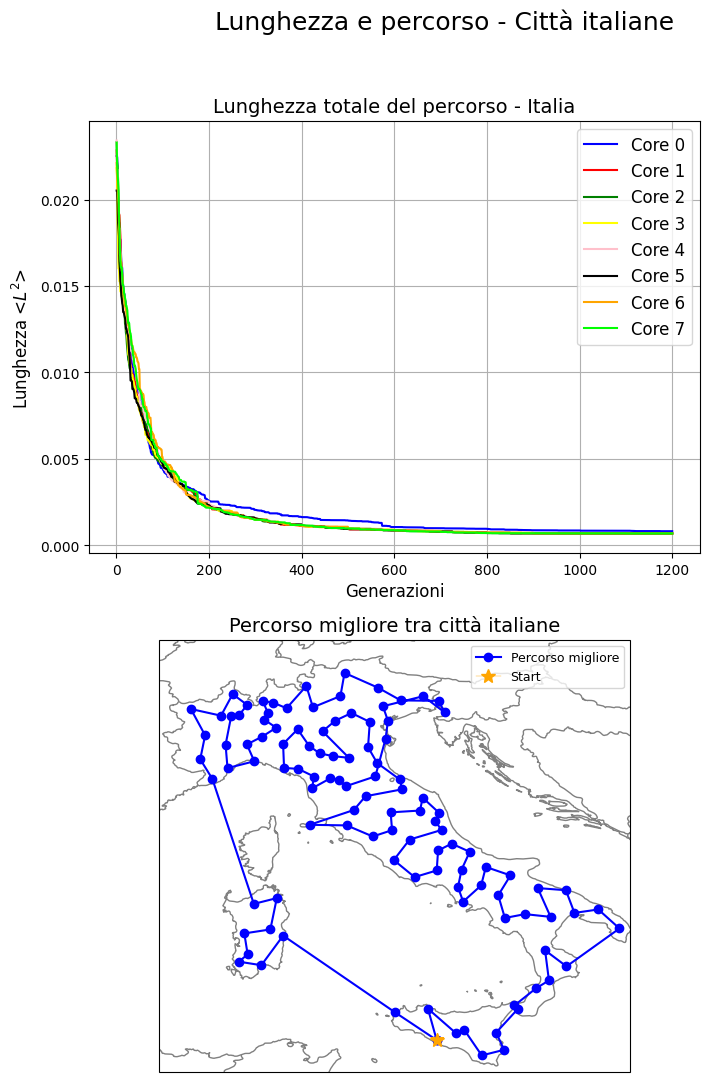

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(9, 11))
plt.suptitle("Lunghezza e percorso - Città italiane", size=18)

#Subplot 1: lunghezze 
ax1 = fig.add_subplot(2, 1, 1)
colors = ['blue','red','green','yellow','pink','black','orange','lime']
min_vals = []

# Carico gen da un file qualsiasi (Core0)
b_lun = np.loadtxt(
    "Results_Ita_Migr_V2/Lenght_0.08_0.60_CittaIta_Core0.dat",
    unpack=True, skiprows=1, usecols=(1,)
)
gen = np.arange(1, b_lun.size+1)

for i, col in enumerate(colors):
    fname = f"Results_Ita_Migr_V2/Lenght_0.08_0.60_CittaIta_Core{i}.dat"
    b = np.loadtxt(fname, skiprows=1, usecols=(1))
    ax1.plot(gen, b/100000, color=col, label=f"Core {i}")
    min_vals.append(np.min(b/100000))

min_value = min(min_vals)
best_core = int(np.argmin(min_vals))
print(f"Minimo globale: {min_value:.6f}, trovato da Core {best_core}")


ax1.set_title("Lunghezza totale del percorso - Italia", fontsize=14)
ax1.set_xlabel("Generazioni", fontsize=12)
ax1.set_ylabel(r'Lunghezza <$L^2$>', fontsize=12)
ax1.legend(loc='upper right', prop={'size': 12})
ax1.grid(True)


# — Subplot 2: percorso con contorno Italia —
# Usiamo un asse georeferenziato
proj = ccrs.PlateCarree()
ax2 = fig.add_subplot(2, 1, 2, projection=proj)

# Carico il percorso del core migliore
pathfile = f"Results_Ita_Migr_V2/Path_0.08_0.60_CittaIta_Core{best_core}.dat"
x_path, y_path = np.loadtxt(pathfile, unpack=True, skiprows=1, usecols=(0,1))

ax2.plot(x_path, y_path, marker='o', linestyle='-', color='blue', label='Percorso migliore')
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', linewidth=0.3, markersize=10, label='Start')

# Aggiungo i confini Italia da Cartopy
ax2.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='gray')
ax2.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='gray')

# Imposto limiti che contengano tutta l’Italia
ax2.set_extent([6.5, 18.5, 36.5, 47.5], crs=proj)

ax2.set_aspect('equal')
ax2.set_title("Percorso migliore tra città italiane", fontsize=14)
ax2.set_xlabel("Longitudine", fontsize=12)
ax2.set_ylabel("Latitudine", fontsize=12)
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

Aumentando il numero di individui il risultato è leggermente peggiorato. Si procede quindi riportando la popolazione a 400 individui.

#### Osservazioni e prova finale

Dalle implementazioni finora svolte si può notare dai grafici delle lunghezze totali come le curve si appiattiscano dopo circa 800 generazioni, senza poi migliorare ulteriormente. L'algoritmo sembrerebbe quindi bloccarsi su minimi locali senza mai raggiungere il risultato ottimale. Come ultimo tentativo si potrebbe introdurre una più alta espressività nell'algoritmo con le seguenti modifiche:
- Settare $N_{migr} = 30$ così che i vari processi siano meno correlati tra di loro ed esplorino spazi diversi.
- Aumentare la probabilità di mutazione per aumentare la variabilità.

Dunque i risultati seguenti sono ottenuti per:
- $N_{migr} = 30$
- Individui per popolazione: 400
- Generazioni: 1300
- Numero di città: 110
- $P_{cross} = 60 \%$
- $P_{mut} = 35 \%$

Minimo globale: 0.000580, trovato da Core 6


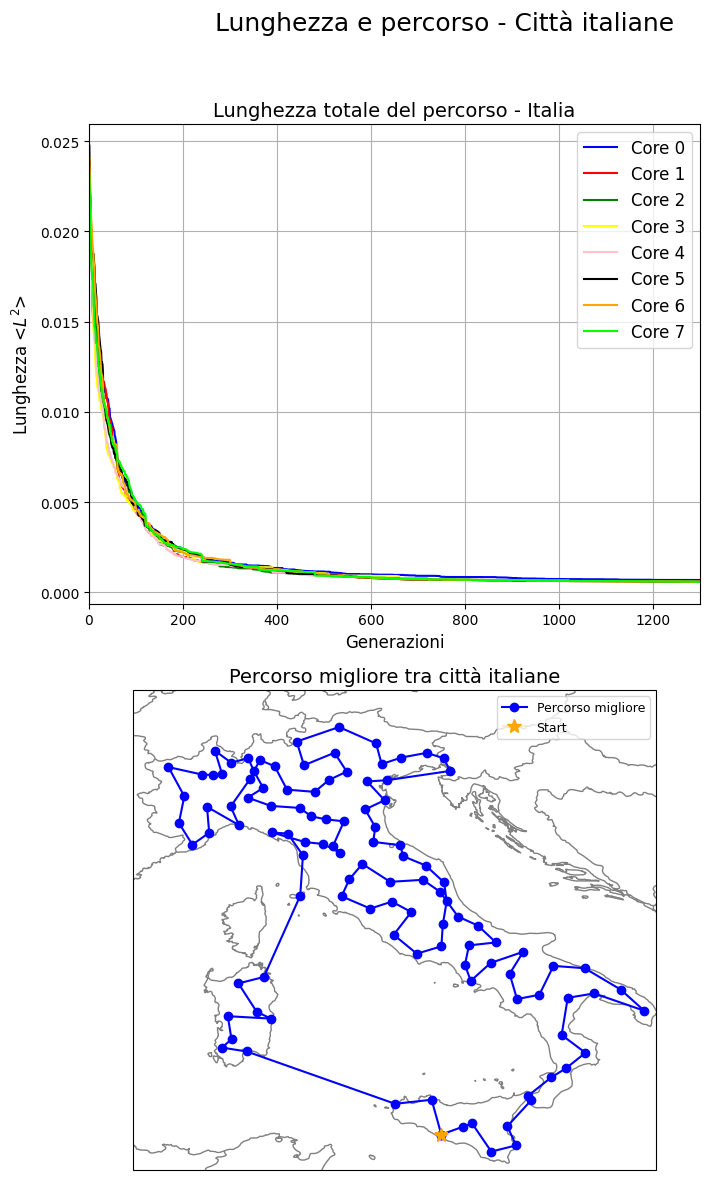

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(9, 12))
plt.suptitle("Lunghezza e percorso - Città italiane", size=18)

#Subplot 1: lunghezze 
ax1 = fig.add_subplot(2, 1, 1)
colors = ['blue','red','green','yellow','pink','black','orange','lime']
min_vals = []

# Carico gen da un file qualsiasi (Core0)
b_lun = np.loadtxt(
    "Results_Ita_Migr_V3/Lenght_0.35_0.60_CittaIta_Core0.dat",
    unpack=True, skiprows=1, usecols=(1,)
)
gen = np.arange(1, b_lun.size+1)

for i, col in enumerate(colors):
    fname = f"Results_Ita_Migr_V3/Lenght_0.35_0.60_CittaIta_Core{i}.dat"
    b = np.loadtxt(fname, skiprows=1, usecols=(1))
    ax1.plot(gen, b/100000, color=col, label=f"Core {i}")
    min_vals.append(np.min(b/100000))

min_value = min(min_vals)
best_core = int(np.argmin(min_vals))
print(f"Minimo globale: {min_value:.6f}, trovato da Core {best_core}")

ax1.set_xlim(0, 1300)
#ax1.set_ylim(0.0, 3.002)
ax1.set_title("Lunghezza totale del percorso - Italia", fontsize=14)
ax1.set_xlabel("Generazioni", fontsize=12)
ax1.set_ylabel(r'Lunghezza <$L^2$>', fontsize=12)
ax1.legend(loc='upper right', prop={'size': 12})
ax1.grid(True)


# — Subplot 2: percorso con contorno Italia —
# Usiamo un asse georeferenziato
proj = ccrs.PlateCarree()
ax2 = fig.add_subplot(2, 1, 2, projection=proj)

# Carico il percorso del core migliore
pathfile = f"Results_Ita_Migr_V3/Path_0.35_0.60_CittaIta_Core{best_core}.dat"
x_path, y_path = np.loadtxt(pathfile, unpack=True, skiprows=1, usecols=(0,1))

ax2.plot(x_path, y_path, marker='o', linestyle='-', color='blue', label='Percorso migliore')
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', linewidth=0.3, markersize=10, label='Start')

# Aggiungo i confini Italia da Cartopy
ax2.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='gray')
ax2.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='gray')

# Imposto limiti che contengano tutta l’Italia
ax2.set_extent([6.5, 18.5, 36.5, 47.5], crs=proj)

ax2.set_aspect('equal')
ax2.set_title("Percorso migliore tra città italiane", fontsize=14)
ax2.set_xlabel("Longitudine", fontsize=12)
ax2.set_ylabel("Latitudine", fontsize=12)
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

Nell'ultimo tentativo si è posto $p=4.5$ come esponente dell'operatore di selezione al posto di $p=2$ dei casi precedenti. Questa scelta fa si che come cromosomi genitori siano scelti con molta più probabilità gli individui promettenti. Inoltre sono stati utilizzati i parametri:
- $N_{migr} = 30$
- Individui per popolazione: 400
- Generazioni: 700
- Numero di città: 110
- $P_{cross} = 80 \%$
- $P_{mut} = 40 \%$

Minimo globale: 0.000580, trovato da Core 7


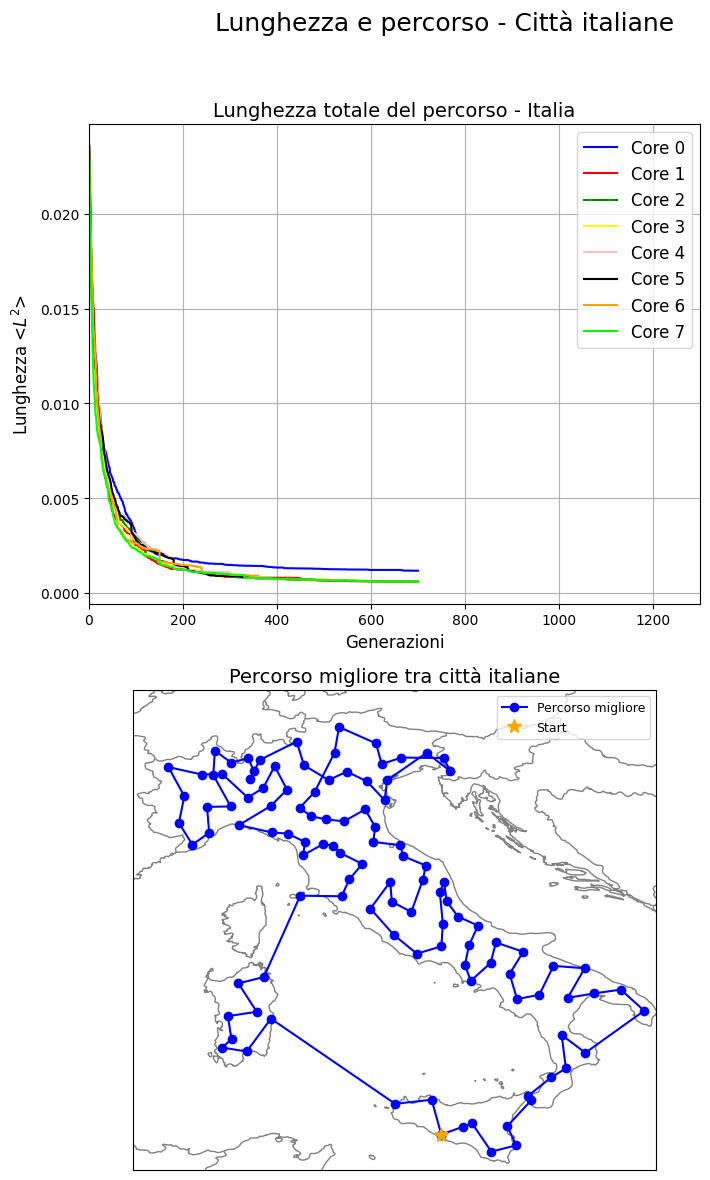

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(9, 12))
plt.suptitle("Lunghezza e percorso - Città italiane", size=18)

#Subplot 1: lunghezze 
ax1 = fig.add_subplot(2, 1, 1)
colors = ['blue','red','green','yellow','pink','black','orange','lime']
min_vals = []

# Carico gen da un file qualsiasi (Core0)
b_lun = np.loadtxt(
    "Results_Ita_Migr_V4/Lenght_0.45_0.80_CittaIta_Core0.dat",
    unpack=True, skiprows=1, usecols=(1,)
)
gen = np.arange(1, b_lun.size+1)

for i, col in enumerate(colors):
    fname = f"Results_Ita_Migr_V4/Lenght_0.45_0.80_CittaIta_Core{i}.dat"
    b = np.loadtxt(fname, skiprows=1, usecols=(1))
    ax1.plot(gen, b/100000, color=col, label=f"Core {i}")
    min_vals.append(np.min(b/100000))

min_value = min(min_vals)
best_core = int(np.argmin(min_vals))
print(f"Minimo globale: {min_value:.6f}, trovato da Core {best_core}")

ax1.set_xlim(0, 1300)
#ax1.set_ylim(0.0, 3.002)
ax1.set_title("Lunghezza totale del percorso - Italia", fontsize=14)
ax1.set_xlabel("Generazioni", fontsize=12)
ax1.set_ylabel(r'Lunghezza <$L^2$>', fontsize=12)
ax1.legend(loc='upper right', prop={'size': 12})
ax1.grid(True)


# — Subplot 2: percorso con contorno Italia —
# Usiamo un asse georeferenziato
proj = ccrs.PlateCarree()
ax2 = fig.add_subplot(2, 1, 2, projection=proj)

# Carico il percorso del core migliore
pathfile = f"Results_Ita_Migr_V4/Path_0.45_0.80_CittaIta_Core{best_core}.dat"
x_path, y_path = np.loadtxt(pathfile, unpack=True, skiprows=1, usecols=(0,1))

ax2.plot(x_path, y_path, marker='o', linestyle='-', color='blue', label='Percorso migliore')
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', linewidth=0.3, markersize=10, label='Start')

# Aggiungo i confini Italia da Cartopy
ax2.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='gray')
ax2.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='gray')

# Imposto limiti che contengano tutta l’Italia
ax2.set_extent([6.5, 18.5, 36.5, 47.5], crs=proj)

ax2.set_aspect('equal')
ax2.set_title("Percorso migliore tra città italiane", fontsize=14)
ax2.set_xlabel("Longitudine", fontsize=12)
ax2.set_ylabel("Latitudine", fontsize=12)
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

Come si può osservare (e da altri tentativi di cui non si riportano i risultati), scegliendo un esponente più alto si accelera notevolmente la convergenza. Nonostante ciò il risultato finale non è ancora quello ottimale.

Sono state svolte molte alte prove variando i vari parametri riportati sopra, non è stato possibile ad ogni modo trovare un risultato migliore dell'ultimo riportato. Con un gran numero di città si osserva quindi come il problema diventi molto più complicato da risolvere numericamente, nemmeno con la parallelizzazione e la tecnica di migrazione dei dati non si è stati in grado di raggiungere il risultato ottimale. 